In [1]:
# Importando as bibliotecas, configurando as casas decimais e subindo o dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

dados_vendas_censo = pd.read_csv("dados_vendas_censo.csv")


In [2]:
# Atualizando o dataset apenas com colunas que serão usadas e excluindo os valores nulos
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [3]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308 entries, 0 to 5604
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             5308 non-null   object 
 1   Bairro          5308 non-null   object 
 2   Cidade          5308 non-null   object 
 3   Metragem        5308 non-null   int64  
 4   Quartos         5308 non-null   int64  
 5   Banheiros       5308 non-null   int64  
 6   Vagas           5308 non-null   int64  
 7   Valor_anuncio   5308 non-null   float64
 8   Valor_mm        5308 non-null   float64
 9   Valor_m2        5308 non-null   float64
 10  latitude        5308 non-null   float64
 11  longitude       5308 non-null   float64
 12  Situacao_setor  5308 non-null   float64
 13  V001            5308 non-null   float64
 14  V002            5308 non-null   float64
 15  V003            5308 non-null   float64
 16  V004            5308 non-null   float64
 17  V005            5308 non-null   f

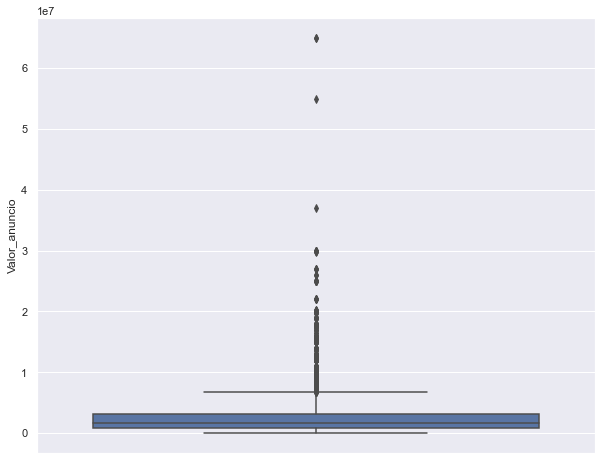

In [4]:
# Com esse gráfico é possível verificar a configuração dos dados e a quantidade de outliers

plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

In [5]:
#verificando quais são os outliers
dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


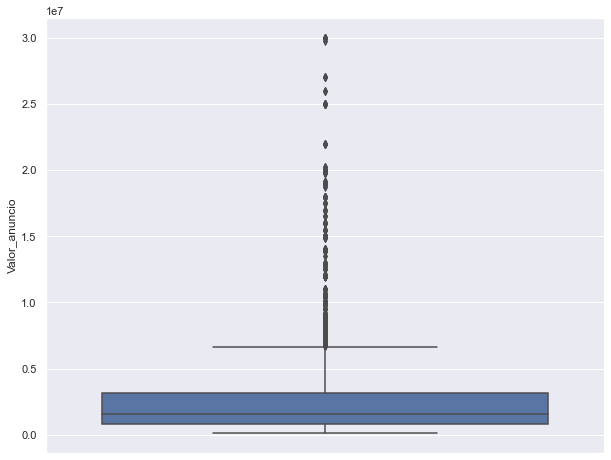

In [6]:
# Apagando os outliers e verificando a nova disposição dos dados
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

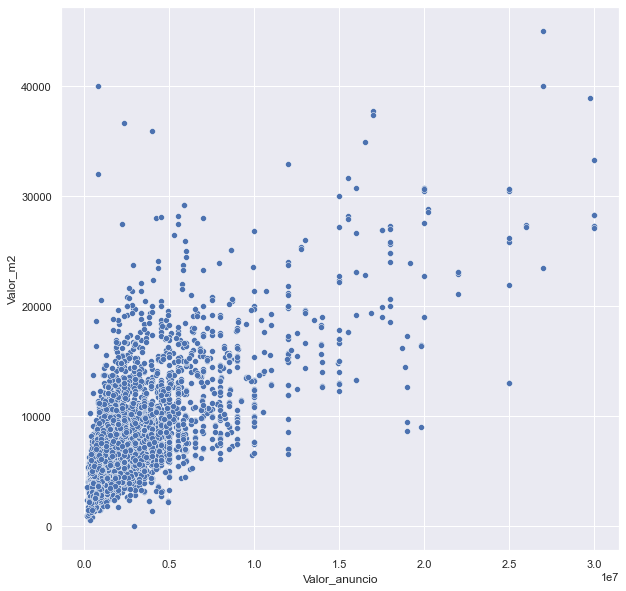

In [33]:
# Tomar cuidado com essa informação porque foi usado do Valor_anuncio para criar o valor_m2

plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2")
plt.show()

In [8]:
# Verificando a relação das colunas entre si

dados_vendas_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


In [ ]:
# Site com corelações espúrias
# https://www.tylervigen.com/spurious-correlations

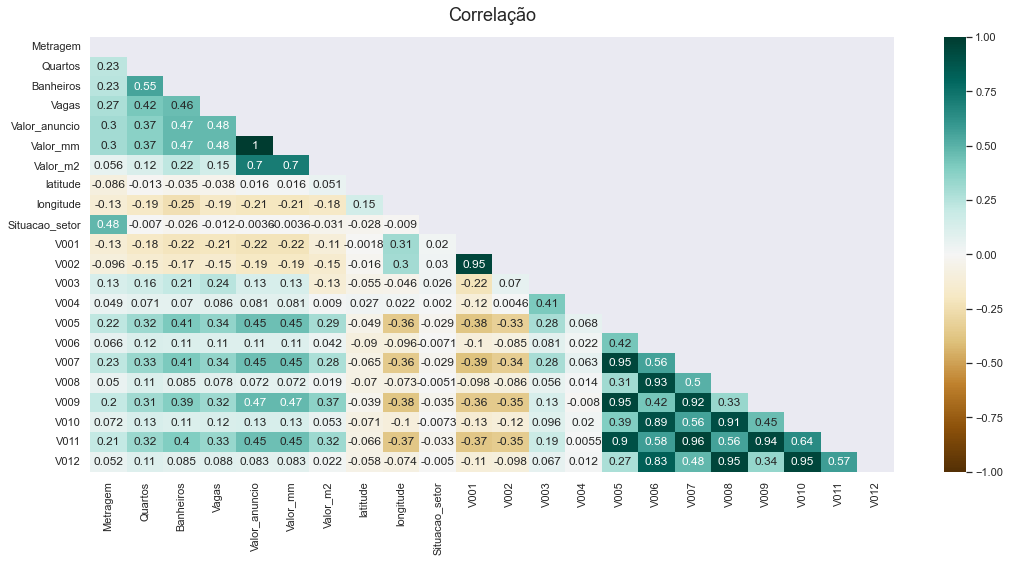

In [9]:
# Mapa de cores mostrando a relação entre as variáveis, como o dados_vendas_censo.corr()
plt.figure(figsize=(18, 8))

mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

In [10]:
#Importando as bibliotecas de machine learning

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [11]:
# X é a variável independente e Y é a variável dependente
X = dados_vendas_censo[["Metragem"]]
Y = dados_vendas_censo[["Valor_anuncio"]]


# O train_test_split divide o dataset em quatro variáveis. X_train e Y_train são as variáveis que serão usadas para
# treinar o modelo. X_test e Y_test servirão para entender se o modelo treinado funciona, como se fosse o grupo controle

# test_size significa a porcentagem que será usada como teste
# random_state é um número usado para gerar aquela mostra específica

# LinearRegression() é o modo de inteligência artificial utilizado e que criará uma equação de primeiro grau para 
# tentar prever o resultado

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()

In [12]:
X

,Metragem
0,1000
1,496
2,125
3,100
4,440
...,...
5599,157
5600,267
5601,95
5603,205


In [13]:
X_train

,Metragem
3522,105
881,240
769,324
3364,484
4674,103
...,...
3558,397
3994,224
5432,238
4044,300


In [14]:
# aqui está passando as variáveis para gerar uma equação (treinar a inteligência artificial). A equação será y = a + b*x, 
# sendo "a" igual ao coef_ e "b" igual ao intercept_ apresentados nas linhas seguintes

lr.fit(X_train, Y_train)

LinearRegression()

In [15]:
lr.coef_

array([[1399.62463672]])

In [16]:
lr.intercept_

array([2235552.26763105])

In [17]:
# aqui está usando a fórmula criada para gerar o Y_predict_test a partir do X_test, que depois será comparada ao grupo controle

Y_predict_test = lr.predict(X_test)
Y_predict_test

array([[4535135.54576313],
       [2319529.74583429],
       [2424501.59358835],
       ...,
       [2802400.24550293],
       [2483285.82833061],
       [2854186.3570616 ]])

In [18]:
Y_test

,Valor_anuncio
172,4500000.00
4513,345000.00
4865,800000.00
4979,4000000.00
1255,5100000.00
...,...
5240,1600000.00
4472,580000.00
3291,2200000.00
432,1500000.00


In [19]:
Y_predict_train = lr.predict(X_train)

In [20]:
Y_train

,Valor_anuncio
3522,692000.00
881,1490000.00
769,2100000.00
3364,6700000.00
4674,622500.00
...,...
3558,4280000.00
3994,1500000.00
5432,2300000.00
4044,1600000.00


In [21]:
#importando bibliotecas para avaliar a inteligência artificial

from sklearn.metrics import mean_absolute_error, r2_score

In [22]:
# o mean_absolute_error está comparando a diferença entre o Y_test (grupo controle) e 
# Y_predict_test (o dado criado a partir da regressão) 

mean_absolute_error(Y_test, Y_predict_test)

1770626.9062636306

In [23]:
mean_absolute_error(Y_train, Y_predict_train)

1825220.303454906

In [24]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V007', 'V009']]

Y = dados_vendas_censo["Valor_anuncio"]


# o r2 é um coeficiente que pode chegar até a 1 e que vê qual a relação das variáveis usadas 
# para tentar chegar ao resultado previsto

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [25]:
mae_test

1349590.3844325517

In [26]:
r2_test

0.377450692546201

In [27]:
mae_train

1362945.6915047597

In [28]:
r2_train

0.39899592785823323

In [29]:
mae_test

1349590.3844325517

In [30]:
r2_test

0.377450692546201

#Desafio Aula 5

1 - Adicionar o valor "real" do m2 do imóvel. 

2 - Testar outro modelos de regressão.

3 - Criar um modelo baseline com as features originais.

4 - Trabalhar um pouco mais nos dados e criar novas variáveis.

5 - Testar as predições para casos reais. 

6 - Criar um projeto com os resultados da imersão. Postar nas redes sociais mostrando o trabalho realizado. 

In [35]:
#Adicionar o valor "real" do m2 do imóvel


bairros_ricos = dados_vendas_censo.query('Bairro == "Vila Nova Conceição" | Bairro == "Jardim Europa" | Bairro == "Itaim Bibi" | Bairro == "Jardim América" | Bairro == "Vila Madalena" | Bairro == "Jardim Paulista" | Bairro == "Pinheiros" | Bairro == "Moema"')

In [36]:
# Bairros presentes na matéria do Valor
# https://valor.globo.com/empresas/noticia/2022/05/10/conheca-os-10-bairros-mais-caros-de-sao-paulo.ghtml

bairros_ricos['Bairro'].unique()

array(['Vila Nova Conceição', 'Vila Madalena', 'Jardim Paulista',
       'Jardim Europa', 'Jardim América', 'Pinheiros', 'Itaim Bibi',
       'Moema'], dtype=object)

In [37]:
a =['Vila Nova Conceição', 'Vila Madalena', 'Jardim Paulista',
       'Jardim Europa', 'Jardim América', 'Pinheiros', 'Itaim Bibi',
       'Moema']

In [38]:
# Criei um dicionário com o valor do metro quadrado real 

df = {'Bairro':['Vila Nova Conceição', 'Vila Madalena', 'Jardim Paulista',
       'Jardim Europa', 'Jardim América', 'Pinheiros', 'Itaim Bibi',
       'Moema'], 'm2_real': [16197, 12564, 12071, 15909, 12687, 12000, 12923, 11540]}

In [39]:
# Transformei o dicionário em um dataframe

valor_real = pd.DataFrame(df)

In [41]:
# Atualizei a informação dos bairros ricos com o metro quadrado real 

bairros_ricos= bairros_ricos.merge(valor_real, how='left')

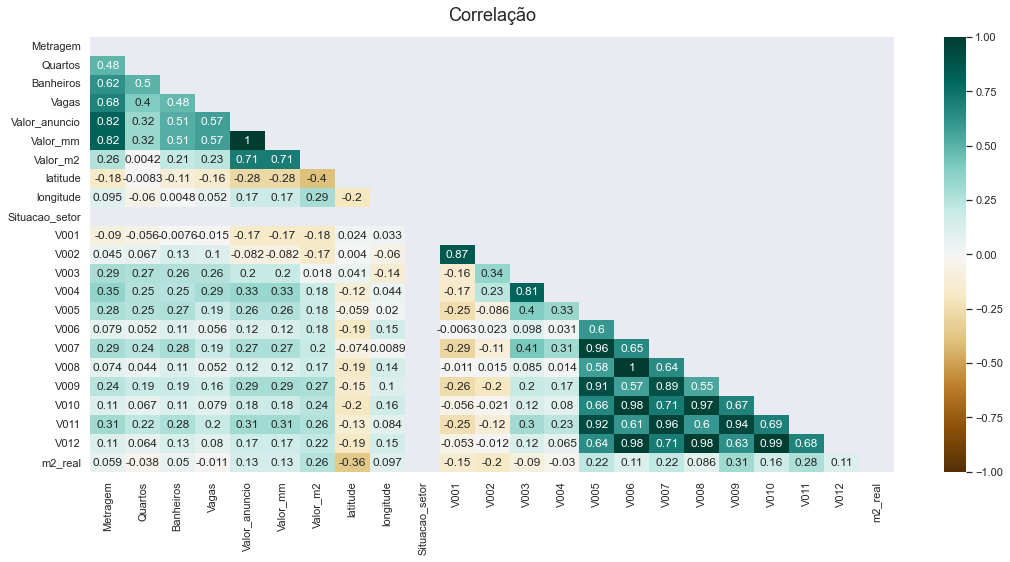

In [42]:
# Conferindo a relação das variáveis

plt.figure(figsize=(18, 8))

mask = np.triu(np.ones_like(bairros_ricos.corr(), dtype=bool))
heatmap = sns.heatmap(bairros_ricos.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

In [43]:
X = bairros_ricos[['V005','V007','V009', 'V011', 'Valor_m2']]
Y = bairros_ricos["m2_real"]


# o r2 é um coeficiente que pode chegar até a 1 e que vê qual a relação das variáveis usadas 
# para tentar chegar ao resultado previsto

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [44]:
r2_test

0.020740919508847377

In [45]:
r2_train

0.17093901710416592

# 2. Testar outro modelos de regressão

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
X = dados_vendas_censo['V005'].values
Y = dados_vendas_censo["Valor_anuncio"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

In [49]:
poly_2 = PolynomialFeatures(degree=2)
X = X.reshape(-1, 1)
X_poly_2 = poly_2.fit_transform(X)

In [50]:
modelo_poly = LinearRegression()
modelo_poly.fit(X_poly_2, Y)
Y_poly_2 = modelo_poly.predict(X_poly_2)

No handles with labels found to put in legend.


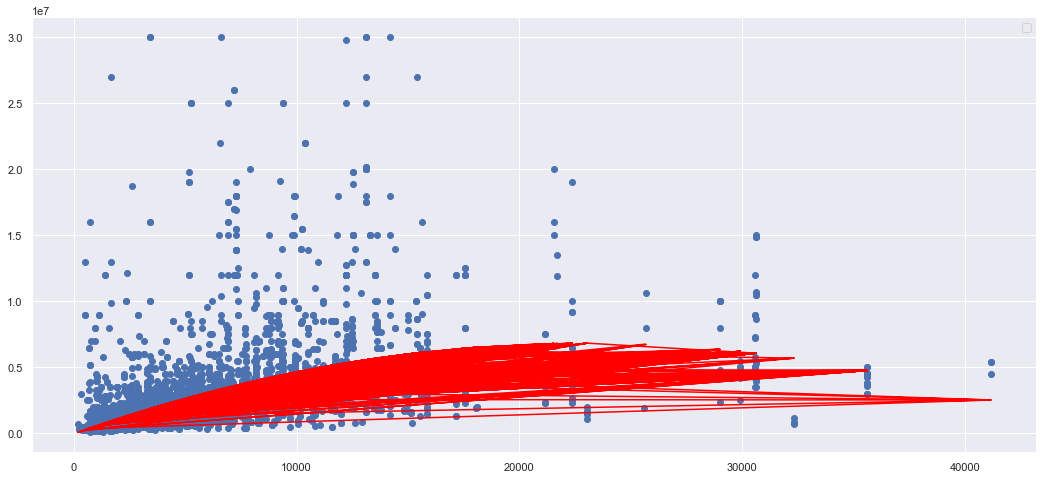

In [52]:
plt.figure(figsize=(18, 8))
plt.scatter(X,Y)
plt.plot(X, Y_poly_2, color='red')
plt.legend()

# 3 - Criar um modelo baseline com as features originais

In [53]:
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [54]:
# criando um dataframe com os dados básicos
dados_baseline = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio', 'Valor_mm', 'Valor_m2']]

In [55]:
dados_baseline

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00
...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95


In [56]:
X = dados_baseline[['Quartos', 'Banheiros']]
Y = dados_baseline["Valor_m2"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [60]:
print(f'com {X.keys()} o r2_test foi {r2_test:.3f} e o r2_train {r2_train:.3f}')

com Index(['Quartos', 'Banheiros'], dtype='object') o r2_test foi 0.039 e o r2_train 0.051


# 4 - Trabalhar um pouco mais nos dados e criar novas variáveis.

In [70]:
media = dados_vendas_censo[['Bairro', 'V002']].groupby('Bairro', as_index=False).mean()

In [62]:
media.rename(columns={"V002":"Media Pop"}, inplace=True)

In [63]:
dados_vendas_censo = dados_vendas_censo.merge(media, how='outer')

In [64]:
dados_vendas_censo.rename(columns={"Media Pop": "Media Pop Bairro"}, inplace=True)

In [65]:
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Media Pop Bairro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74,637.44
1,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,2190000.00,2.19,8760.00,...,1.93,2926.73,15099968.80,4596.47,16045842.33,1846.16,9062308.25,3451.97,11408075.84,637.44
2,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,1390000.00,1.39,7554.35,...,1.71,3965.03,10291324.02,4150.53,10001176.78,2502.95,7845768.70,3355.35,7657023.32,637.44
3,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,2014000.00,2.01,10070.00,...,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85,637.44
4,"Avenida Moaci, 1445",Planalto Paulista,São Paulo,420,5,7,6,1900000.00,1.90,4523.81,...,2.09,3505.82,15829641.21,3795.96,16039781.82,2185.48,9183755.89,2904.10,10119740.20,637.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Rua Santo Inácio,Parque São Jorge,São Paulo,120,2,1,1,560000.00,0.56,4666.67,...,1.89,3268.36,10042145.21,3523.45,9926554.88,2357.69,8238171.16,2880.44,8559720.27,534.00
5299,"Rua José Santana, 480",Vila Reis,São Paulo,66,2,1,2,320004.00,0.32,4848.55,...,3.39,938.55,501204.71,1015.48,463962.23,596.33,417828.66,931.76,340078.99,640.00
5300,Rua das Bromeliáceas,Parque das Árvores,São Paulo,180,4,3,5,1500000.00,1.50,8333.33,...,1.69,2031.11,3532239.57,2223.72,3438489.88,1286.13,2559649.22,1860.47,2634296.58,871.00
5301,Rua Aquino Fonseca,Jardim das Carmelitas,São Paulo,96,3,2,2,553000.00,0.55,5760.42,...,2.02,1911.26,3677122.76,2180.79,3607440.98,1206.22,2284074.61,1679.38,2385704.00,562.00


In [66]:
dados_vendas_censo['Renda por quarto'] = dados_vendas_censo['V007']/dados_vendas_censo['V009']

In [67]:
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V005,V006,V007,V008,V009,V010,V011,V012,Media Pop Bairro,Renda por quarto
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74,637.44,2.66
1,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,2190000.00,2.19,8760.00,...,2926.73,15099968.80,4596.47,16045842.33,1846.16,9062308.25,3451.97,11408075.84,637.44,2.49
2,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,1390000.00,1.39,7554.35,...,3965.03,10291324.02,4150.53,10001176.78,2502.95,7845768.70,3355.35,7657023.32,637.44,1.66
3,Alameda dos Guainumbis,Planalto Paulista,São Paulo,200,4,6,3,2014000.00,2.01,10070.00,...,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85,637.44,1.98
4,"Avenida Moaci, 1445",Planalto Paulista,São Paulo,420,5,7,6,1900000.00,1.90,4523.81,...,3505.82,15829641.21,3795.96,16039781.82,2185.48,9183755.89,2904.10,10119740.20,637.44,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Rua Santo Inácio,Parque São Jorge,São Paulo,120,2,1,1,560000.00,0.56,4666.67,...,3268.36,10042145.21,3523.45,9926554.88,2357.69,8238171.16,2880.44,8559720.27,534.00,1.49
5299,"Rua José Santana, 480",Vila Reis,São Paulo,66,2,1,2,320004.00,0.32,4848.55,...,938.55,501204.71,1015.48,463962.23,596.33,417828.66,931.76,340078.99,640.00,1.70
5300,Rua das Bromeliáceas,Parque das Árvores,São Paulo,180,4,3,5,1500000.00,1.50,8333.33,...,2031.11,3532239.57,2223.72,3438489.88,1286.13,2559649.22,1860.47,2634296.58,871.00,1.73
5301,Rua Aquino Fonseca,Jardim das Carmelitas,São Paulo,96,3,2,2,553000.00,0.55,5760.42,...,1911.26,3677122.76,2180.79,3607440.98,1206.22,2284074.61,1679.38,2385704.00,562.00,1.81


In [68]:
X = dados_vendas_censo[["Media Pop Bairro", "Renda por quarto"]]
Y = dados_vendas_censo["Valor_m2"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [69]:
print(f'com {X.keys()} o r2_test foi {r2_test:.3f} e o r2_train {r2_train:.3f}')

com Index(['Media Pop Bairro', 'Renda por quarto'], dtype='object') o r2_test foi 0.053 e o r2_train 0.043
